AIM :-

Create a machine learning model to predict whether a person survived in Titanic or not.


1 Perform the EDA


2 Apply Naive Bayes classifier 


3 Apply SVM


4 Apply RF


5 Evaluate the performance using Precision, Recall, F1 score and accuracy.


6 Apply hyper parameter tuning to improve performance.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("Titanic-Dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.drop(['Name','SibSp','Parch','Embarked'], axis=1,inplace=True)

In [6]:
df

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin
0,1,0,3,male,22.0,A/5 21171,7.2500,NaN
1,2,1,1,female,38.0,PC 17599,71.2833,C85
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,female,35.0,113803,53.1000,C123
4,5,0,3,male,35.0,373450,8.0500,NaN
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,211536,13.0000,NaN
887,888,1,1,female,19.0,112053,30.0000,B42
888,889,0,3,female,NaN,W./C. 6607,23.4500,NaN
889,890,1,1,male,26.0,111369,30.0000,C148


In [7]:
df.drop(['Ticket','Cabin'], axis=1,inplace=True)

In [8]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500
...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000
887,888,1,1,female,19.0,30.0000
888,889,0,3,female,NaN,23.4500
889,890,1,1,male,26.0,30.0000


In [9]:
df.isnull()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
886,False,False,False,False,False,False
887,False,False,False,False,False,False
888,False,False,False,False,True,False
889,False,False,False,False,False,False


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
dtype: int64

In [11]:
mean = df["Age"].mean()

In [12]:
df["Age"].fillna(mean, inplace = True)

In [13]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.000000,7.2500
1,2,1,1,female,38.000000,71.2833
2,3,1,3,female,26.000000,7.9250
3,4,1,1,female,35.000000,53.1000
4,5,0,3,male,35.000000,8.0500
...,...,...,...,...,...,...
886,887,0,2,male,27.000000,13.0000
887,888,1,1,female,19.000000,30.0000
888,889,0,3,female,29.699118,23.4500
889,890,1,1,male,26.000000,30.0000


In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
dtype: int64

In [15]:
df['PassengerId'].duplicated().sum()

0

In [16]:
df.drop(['Fare'], axis=1,inplace=True)

In [74]:
#df.loc[df["Sex"]=="female"]=0
#df.loc[df["Sex"]=="male"]=1

In [17]:
df

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.000000
1,2,1,1,female,38.000000
2,3,1,3,female,26.000000
3,4,1,1,female,35.000000
4,5,0,3,male,35.000000
...,...,...,...,...,...
886,887,0,2,male,27.000000
887,888,1,1,female,19.000000
888,889,0,3,female,29.699118
889,890,1,1,male,26.000000


In [18]:
df['Sex'].replace({'male':0,'female':1},inplace=True)

In [19]:
df

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,0,22.000000
1,2,1,1,1,38.000000
2,3,1,3,1,26.000000
3,4,1,1,1,35.000000
4,5,0,3,0,35.000000
...,...,...,...,...,...
886,887,0,2,0,27.000000
887,888,1,1,1,19.000000
888,889,0,3,1,29.699118
889,890,1,1,0,26.000000


In [20]:
target = df.Survived

In [21]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [22]:
data = df.drop('Survived',axis=1)

In [23]:
data

,PassengerId,Pclass,Sex,Age
0,1,3,0,22.000000
1,2,1,1,38.000000
2,3,3,1,26.000000
3,4,1,1,35.000000
4,5,3,0,35.000000
...,...,...,...,...
886,887,2,0,27.000000
887,888,1,1,19.000000
888,889,3,1,29.699118
889,890,1,0,26.000000


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [25]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2)

In [26]:
x_train,x_test,y_train,y_test

(     PassengerId  Pclass  Sex        Age
 870          871       3    0  26.000000
 363          364       3    0  35.000000
 678          679       3    1  43.000000
 233          234       3    1   5.000000
 877          878       3    0  19.000000
 ..           ...     ...  ...        ...
 528          529       3    0  39.000000
 564          565       3    1  29.699118
 715          716       3    0  19.000000
 87            88       3    0  29.699118
 717          718       2    1  27.000000
 
 [712 rows x 4 columns],
      PassengerId  Pclass  Sex        Age
 510          511       3    0  29.000000
 821          822       3    0  27.000000
 201          202       3    0  29.699118
 8              9       3    1  27.000000
 633          634       1    0  29.699118
 ..           ...     ...  ...        ...
 358          359       3    1  29.699118
 406          407       3    0  51.000000
 315          316       3    1  26.000000
 390          391       1    0  36.000000
 511   

In [27]:
len(x_train)

712

In [44]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [45]:
y_pred = model.predict(x_test)

In [46]:
model.score(x_test,y_test)

0.7932960893854749

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:

accuracy_score(y_test,y_pred)

0.7932960893854749

In [49]:
confusion_matrix(y_test, y_pred)

array([[94, 11],
       [26, 48]], dtype=int64)

In [51]:
cm = confusion_matrix(y_test,y_pred,labels= model.classes_)

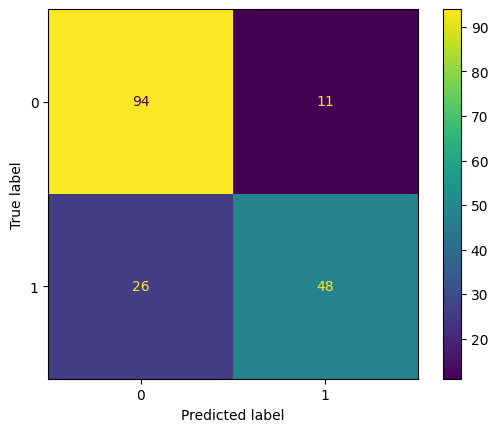

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = model.classes_)
disp.plot()

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.81      0.65      0.72        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.79       179

